In [1]:
import pandas as pd

# Load dataset
file_path = 'C:\\Users\\David\\Downloads\\archive\\uber.csv'
df = pd.read_csv(file_path)

# Display basic info
print("Shape of dataset:", df.shape)
print("\nFirst 5 rows:\n", df.head())
print("\nColumn types:\n", df.dtypes)


Shape of dataset: (200000, 9)

First 5 rows:
    Unnamed: 0                            key  fare_amount  \
0    24238194    2015-05-07 19:52:06.0000003          7.5   
1    27835199    2009-07-17 20:04:56.0000002          7.7   
2    44984355   2009-08-24 21:45:00.00000061         12.9   
3    25894730    2009-06-26 08:22:21.0000001          5.3   
4    17610152  2014-08-28 17:47:00.000000188         16.0   

           pickup_datetime  pickup_longitude  pickup_latitude  \
0  2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1  2009-07-17 20:04:56 UTC        -73.994355        40.728225   
2  2009-08-24 21:45:00 UTC        -74.005043        40.740770   
3  2009-06-26 08:22:21 UTC        -73.976124        40.790844   
4  2014-08-28 17:47:00 UTC        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  
0         -73.999512         40.723217                1  
1         -73.994710         40.750325                1  
2         -73.962565  

In [2]:
# General overview
print(df.info())

# Summary statistics
print(df.describe(include='all'))

# Check for null values
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB
None
          Unnamed: 0                          key    fare_amount  \
count   2.000000e+05                       200000  200000.000000   
unique           NaN                       200000            NaN   
top              NaN  2015-05-07 19:52:06.0000003            NaN   
freq       

In [4]:
# Drop rows with missing target values (e.g., fare_amount)
df = df.dropna(subset=['fare_amount'])

# Optional: Drop any column with too many missing values
threshold = 0.5 * len(df)  # e.g., drop if more than 50% missing
df = df.dropna(thresh=threshold, axis=1)

# Fill other missing values (if necessary)
df = df.ffill() 


In [5]:
# Save the cleaned data to CSV
cleaned_file = 'cleaned_uber_fares.csv'
df.to_csv(cleaned_file, index=False)
print(f"Cleaned data exported to {cleaned_file}")


Cleaned data exported to cleaned_uber_fares.csv


In [6]:
import pandas as pd

# Load the cleaned dataset
df = pd.read_csv('cleaned_uber_fares.csv')

# Basic descriptive statistics
print("Descriptive statistics:")
print(df.describe())

# Median
print("\nMedian fare amount:", df['fare_amount'].median())

# Mode
print("\nMode of passenger count:", df['passenger_count'].mode()[0])

# Quartiles
print("\nFare quartiles:\n", df['fare_amount'].quantile([0.25, 0.5, 0.75]))

# Range
fare_range = df['fare_amount'].max() - df['fare_amount'].min()
print("\nFare range:", fare_range)

# Standard deviation
print("\nStandard deviation of fare:", df['fare_amount'].std())


Descriptive statistics:
         Unnamed: 0    fare_amount  pickup_longitude  pickup_latitude  \
count  2.000000e+05  200000.000000     200000.000000    200000.000000   
mean   2.771250e+07      11.359955        -72.527638        39.935885   
std    1.601382e+07       9.901776         11.437787         7.720539   
min    1.000000e+00     -52.000000      -1340.648410       -74.015515   
25%    1.382535e+07       6.000000        -73.992065        40.734796   
50%    2.774550e+07       8.500000        -73.981823        40.752592   
75%    4.155530e+07      12.500000        -73.967154        40.767158   
max    5.542357e+07     499.000000         57.418457      1644.421482   

       dropoff_longitude  dropoff_latitude  passenger_count  
count      200000.000000     200000.000000    200000.000000  
mean          -72.525299         39.923895         1.684535  
std            13.117375          6.794812         1.385997  
min         -3356.666300       -881.985513         0.000000  
25%     

Matplotlib is building the font cache; this may take a moment.


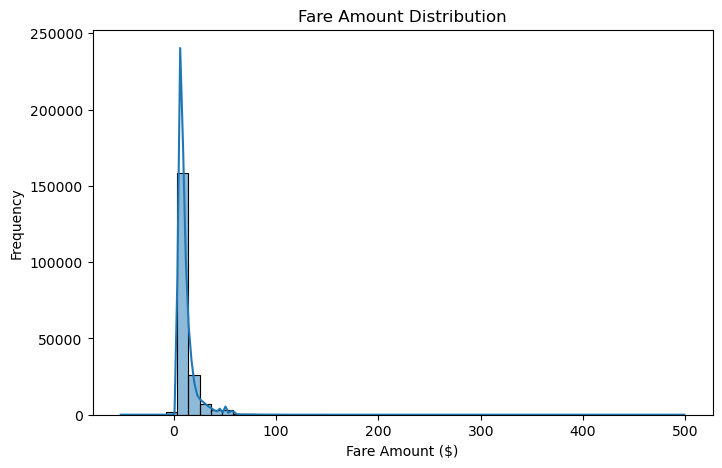

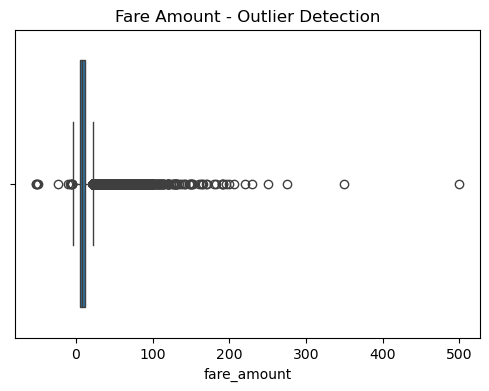

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for fare amount
plt.figure(figsize=(8, 5))
sns.histplot(df['fare_amount'], bins=50, kde=True)
plt.title("Fare Amount Distribution")
plt.xlabel("Fare Amount ($)")
plt.ylabel("Frequency")
plt.show()

# Boxplot to identify outliers
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['fare_amount'])
plt.title("Fare Amount - Outlier Detection")
plt.show()


In [9]:
import numpy as np

def haversine_distance(lat1, lon1, lat2, lon2):
    # Earth radius in kilometers
    R = 6371  

    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    dphi = np.radians(lat2 - lat1)
    dlambda = np.radians(lon2 - lon1)

    a = np.sin(dphi / 2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(dlambda / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    return R * c  # returns distance in kilometers

# Apply to your DataFrame
df['trip_distance'] = haversine_distance(
    df['pickup_latitude'],
    df['pickup_longitude'],
    df['dropoff_latitude'],
    df['dropoff_longitude']
)



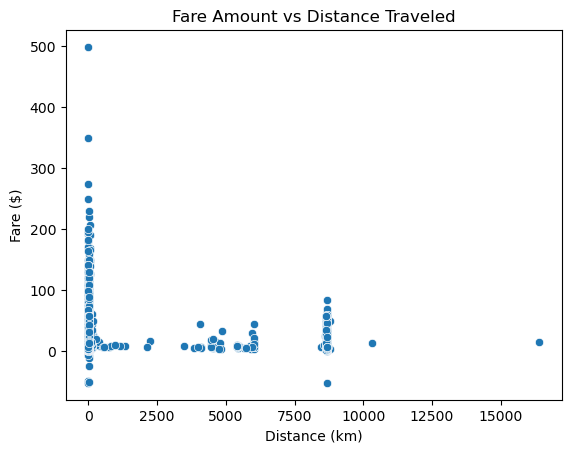

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='trip_distance', y='fare_amount', data=df)
plt.title("Fare Amount vs Distance Traveled")
plt.xlabel("Distance (km)")
plt.ylabel("Fare ($)")
plt.show()


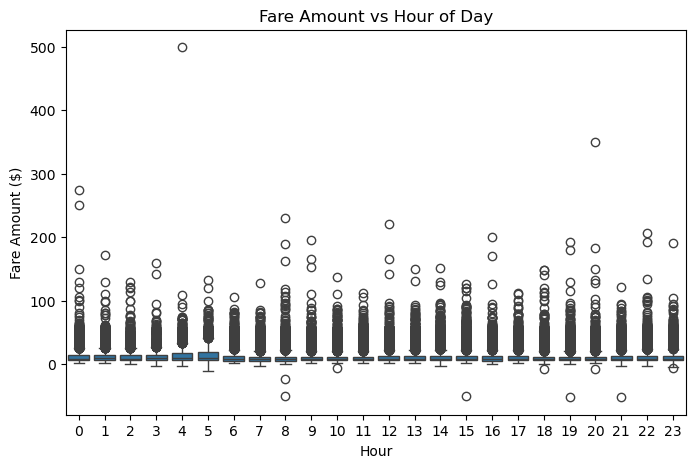

In [11]:
# Convert to datetime if not already
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

# Extract hour
df['hour'] = df['pickup_datetime'].dt.hour

# Plot fare vs hour
plt.figure(figsize=(8, 5))
sns.boxplot(x='hour', y='fare_amount', data=df)
plt.title("Fare Amount vs Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Fare Amount ($)")
plt.show()


In [12]:
# Make sure pickup_datetime is a datetime object
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

# Extract features
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_day'] = df['pickup_datetime'].dt.day
df['pickup_month'] = df['pickup_datetime'].dt.month
df['pickup_day_of_week'] = df['pickup_datetime'].dt.day_name()  # e.g., Monday


In [13]:
def get_peak_label(hour):
    if 7 <= hour <= 9 or 16 <= hour <= 19:
        return 'Peak'
    else:
        return 'Off-Peak'

df['peak_time'] = df['pickup_hour'].apply(get_peak_label)


In [14]:
print(df.dtypes)

# Convert day name or peak label to category (optional)
df['pickup_day_of_week'] = df['pickup_day_of_week'].astype('category')
df['peak_time'] = df['peak_time'].astype('category')


Unnamed: 0                          int64
key                                object
fare_amount                       float64
pickup_datetime       datetime64[ns, UTC]
pickup_longitude                  float64
pickup_latitude                   float64
dropoff_longitude                 float64
dropoff_latitude                  float64
passenger_count                     int64
trip_distance                     float64
hour                                int32
pickup_hour                         int32
pickup_day                          int32
pickup_month                        int32
pickup_day_of_week                 object
peak_time                          object
dtype: object


In [15]:
# Save enhanced dataset
df.to_csv('enhanced_uber_fares.csv', index=False)
print("Enhanced dataset saved for Power BI: enhanced_uber_fares.csv")


Enhanced dataset saved for Power BI: enhanced_uber_fares.csv


In [16]:
# Remove trips with zero or negative fare or distance
df = df[(df['fare_amount'] > 0) & (df['trip_distance'] > 0)]

# Optional: Remove extreme outliers (like $500 fares or 1000 km distances)
df = df[df['fare_amount'] < 100]
df = df[df['trip_distance'] < 100]


In [17]:
df.to_csv('enhanced_uber_fares_cleaned.csv', index=False)
